중국인 관광 입국객 변화 추이
특이사항 : ? 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def call_df(x,y):
    return pd.read_excel(f"실습 파일/한국관광데이터/kto_{x}{y}.xlsx", header=1, skipfooter=4)

In [6]:
sample=[]
for x in range(2010,2021):
    for y in range(1,13):
        if x== 2020 and y==5:
            break
        sample.append(call_df(str(x),str(y).zfill(2)))
        
df_kto = pd.concat(sample)

df_kto

,국적,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%)
0,아시아주,329131,18238,421,4339,80916,433045,474653,-8.8,76.0
1,일본,202825,1750,89,549,3971,209184,237816,-12.0,36.7
2,대만,35788,41,17,37,516,36399,37425,-2.7,6.4
3,홍콩,13874,55,0,21,595,14545,25207,-42.3,2.6
4,마카오,554,0,0,0,0,554,955,-42.0,0.1
...,...,...,...,...,...,...,...,...,...,...
62,아프리카 기타,11,5,0,11,150,177,3858,-95.4,0.6
63,기타대륙,0,0,0,0,3,3,64,-95.3,0.0
64,국적미상,0,0,0,0,3,3,64,-95.3,0.0
65,교포소계,0,0,0,0,698,698,20174,-96.5,2.4


In [7]:
box = []
for y in range(2010, 2021):
    for m in range(1, 13):
        if y == 2020 and m == 6:
            break
        month = str(m).zfill(2)
        df = pd.read_excel(f"한국관광데이터/kto_{y}{month}.xlsx",
                           header = 1, skipfooter = 4)
        df['YEAR'] = y
        df['MONTH'] = m
        box.append(df)
df = pd.concat(box)
df = df[df["국적"] == "중국"]
import seaborn as sns
import matplotlib.pyplot as plt
a = df.pivot_table(index = "YEAR", columns = "MONTH", values = "관광")
sns.heatmap(a, cmap = "Blues")

FileNotFoundError: [Errno 2] No such file or directory: '한국관광데이터/kto_201001.xlsx'

In [60]:
import os
import pandas as pd
import koreanize_matplotlib

data_path = r"실습 파일/한국관광데이터"
file_list = os.listdir(data_path)

dfs = []  
for file in file_list:
    file_path = os.path.join(data_path, file)
    data = pd.read_excel(file_path, header=1)  # header를 1로 설정
    dfs.append(data)

# 모든 데이터프레임을 합치기
final_df = pd.concat(dfs, ignore_index=True)
final_df

,국적,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%)
0,아시아주,329131.0,18238.0,421.0,4339.0,80916.0,433045.0,474653.0,-8.8,76.0
1,일본,202825.0,1750.0,89.0,549.0,3971.0,209184.0,237816.0,-12.0,36.7
2,대만,35788.0,41.0,17.0,37.0,516.0,36399.0,37425.0,-2.7,6.4
3,홍콩,13874.0,55.0,0.0,21.0,595.0,14545.0,25207.0,-42.3,2.6
4,마카오,554.0,0.0,0.0,0.0,0.0,554.0,955.0,-42.0,0.1
...,...,...,...,...,...,...,...,...,...,...
8870,교포,0.0,0.0,0.0,0.0,790.0,790.0,18788.0,-95.8,2.6
8871,계,6111.0,435.0,253.0,2192.0,21870.0,30861.0,NaN,NaN,NaN
8872,전년동기,1233562.0,15020.0,6457.0,20702.0,209943.0,1485684.0,NaN,NaN,NaN
8873,성장률(%),-99.5,-97.1,-96.1,-89.4,-89.6,-97.9,NaN,NaN,NaN


In [64]:
china = final_df[final_df.국적=='중국'].reset_index()

lenn = china.shape[0]

china.index = [i%12 for i in range(1,lenn+1)]
china['month'] = china.index

start = 2010
china.index = [start + i//12 for i in range(1,lenn+1)]
china['year'] = china.index

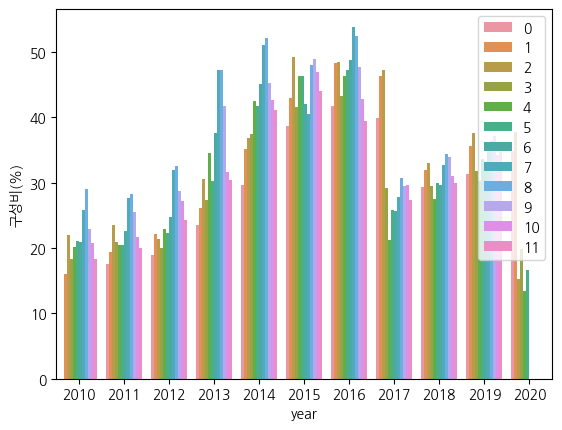

In [91]:
plt.figure()
sns.barplot(y=china['구성비(%)'],x=china['year'],hue=china['month'])
plt.legend(loc='upper right')

<Axes: xlabel='year', ylabel='관광'>

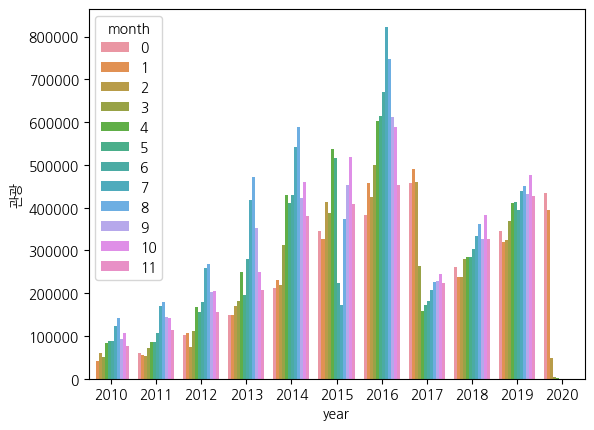

In [87]:
plt.figure()
sns.barplot(y=china['관광'],x=china['year'],hue=china['month'])

<Axes: >

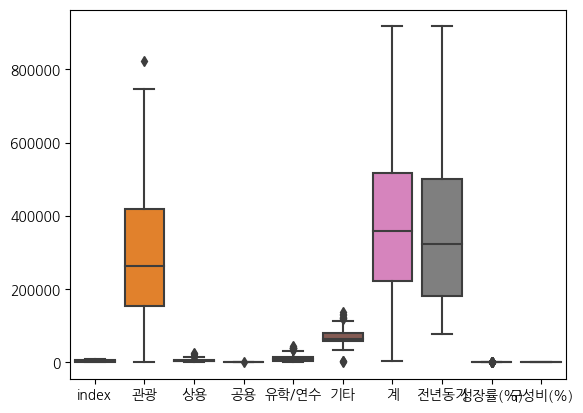

In [65]:
plt.figure()
sns.boxplot(df_china)

<Axes: xlabel='month', ylabel='계'>

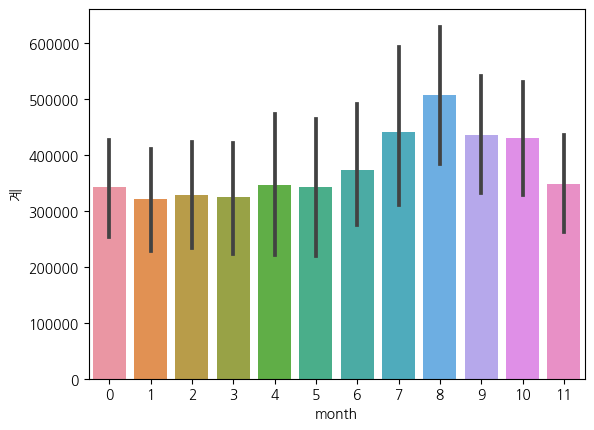

In [82]:
sns.barplot(y = china.계, x = china.month)